
## Data, URLs

### Weather Data
[Met Eireann Historical Data](https://www.met.ie/climate/available-data/historical-data)


### Athenry  
[Hourly wind data since 2010](https://cli.fusio.net/cli/climate_data/webdata/hly1875.zip)
[Daily ](https://cli.fusio.net/cli/climate_data/webdata/dly1875.zip)


### Units
All wind speed and highes gust units are in knots (kt).  A knot is one nautical mile per hour, or about 1.15 statute miles per hour or 1.852 km/h.

### Wind Speed
from [Google's Generative AI](https://www.google.com)
Large-scale wind turbines typically start turning at wind speeds of 7–9 miles per hour and reach their maximum output at around 27 miles per hour. They begin to reduce power or disconnect at wind speeds above 25 miles per hour. At these high speeds, the turbine's braking system activates to prevent damage to the blades. 
Efficiency
Wind turbines are most efficient at around 18 miles per hour. 
The consistency of the wind is more important than the speed for producing the most wind power. 

[Ireland](https://enerpower.ie/portfolio-item/wind-turbine-faq-ireland/)
Wind turbines typically start operating at wind speeds around Beaufort Force 3, or around 3-5 metres per second (m/s), or 8-12 miles per hour (mph). Turbines reach maximum power output at Beaufort 5 (around 11-14 m/s or 25-30 mph).  1609.3m in a mile

| Wind Speed m/s | Wind Speed mi/h | What Happens |  
|----------------|-----------------|--------------|  
| ≤ 3-5  | ≤ 8-12  | Wind turbines start operating  |  
| 11–14  |  25-30  | Wind turbines reach maximum power output  |   
| ≥ 24   | ≥ 55    | Wind turbines shut down to prevent damage  |   

To take a specific example, the [Siemens SWT-3.0-101 3MW turbine](https://www.thewindpower.net/turbine_en_275_siemens_swt-3.0-101.php) is use in the [Galway Wind Park](https://www.sserenewables.com/onshore-wind/ireland/galway-wind-park/), located in the Cloosh Valley south-west of Oughterard in Co. Galway. 58 of these are deployed for a total yield of 174MW. This was the largest wind park in the country until it was overtaken by the second phase of the 192MW [Oweninny Wind Farm](https://www.oweninnywindfarm.ie/the-wind-farm/), which uses 29 3.2MW Siemens SWT-3.2-113 turbines with an installed capacity of 93MW and 31 Nordex N117/3600 wind turbines with an installed capacity of 99MW.

In [260]:
# Import the required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [261]:
# The following 
#rating = np.array([['0', 0],['0.5', 0],['1', 0],['1.5', 0],['2', 0],['2.5', 0],['3', 0],['3.5', 50],['4', 113],['4.5', 183],['5', 253],['5.5', 342],['6', 430],['6.5', 569],['7', 707],['7.5', 891],['8', 1075],['8.5', 1306],['9', 1537],['9.5', 1796],['10', 2054],['10.5', 2302],['11', 2549],['11.5', 2750],['12', 2876],['12.5', 2950],['13', 2982],['13.5', 2995],['14', 2998],['14.5', 3000],['15', 3000],['15.5', 3000],['16', 3000],['16.5', 3000],['17', 3000],['17.5', 3000],['18', 3000],['18.5', 3000],['19', 3000],['19.5', 3000],['20', 3000],['20.5', 3000],['21', 3000],['21.5', 3000],['22', 3000],['22.5', 3000],['23', 3000],['23.5', 3000],['24', 3000],['24.5', 3000],['25', 3000],['25.5', 0],['26', 0]])
#ratingp = pd.DataFrame(data = rating, columns = ["windspeed", "power"])
#rating = rating.astype('float')
#ratingp = pd.DataFrame(data = rating, columns = ["windspeed", "power"])


(0.0, 27.0)

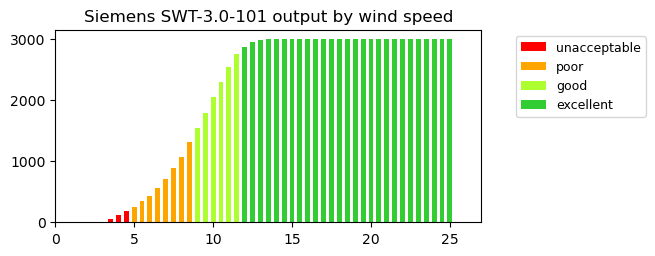

In [348]:
# Read in and plot the power output vs wind speed data
ratingp = pd.read_csv("./data/poweroutput.txt",sep=",", header=None, names=["windspeed", "power"])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.5,2.5))
output = ['unacceptable','poor','good','excellent']
axes.bar(ratingp.windspeed[0:10], ratingp.power[0:10], color='red',width=0.31)
axes.bar(ratingp.windspeed[10:18], ratingp.power[10:18], color='orange',width=0.31)
axes.bar(ratingp.windspeed[18:24], ratingp.power[18:24], color='greenyellow',width=0.31)
axes.bar(ratingp.windspeed[24:52], ratingp.power[24:52], color='limegreen',width=0.31)
axes.bar(ratingp.windspeed[52:54], ratingp.power[52:54], color='red',width=0.31)
axes.set_title('Siemens SWT-3.0-101 output by wind speed', fontsize=12)
axes.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right',labels=output, fontsize=9)
plt.xlim([0, max(ratingp.windspeed)+1.0])


## Analysis - Weather Data
While there are 31 weather stations in Galwy making daily weather available for [download](https://www.met.ie/climate/available-data/historical-data), most focus on precipitation and only 2 provide wind speed - Athenry and Mace Head. The study will focus on data from Athenry weather station.

According to the information in the header of the csv file, the fields we are interested in are:
date:  -  00 to 00 utc
wdsp:  -  Mean Wind Speed (kt)
hm:    -  Highest ten minute mean wind speed (kt)		                 
hg:    -  Highest Gust (kt)

In [263]:
df = pd.read_csv("data/dly1875.csv", skiprows=24,low_memory=False)
#df = df.drop(0)
df.dtypes

date       object
ind         int64
maxtp     float64
ind.1       int64
mintp     float64
igmin      object
gmin       object
ind.2       int64
rain       object
cbl        object
wdsp       object
ind.3       int64
hm          int64
ind.4       int64
ddhm       object
ind.5       int64
hg          int64
soil       object
pe         object
evap       object
smd_wd     object
smd_md     object
smd_pd     object
glorad     object
dtype: object

In [264]:
df.describe()


,ind,maxtp,ind.1,mintp,ind.2,ind.3,hm,ind.4,ind.5,hg
count,5392.000000,5392.00000,5392.000000,5392.000000,5392.000000,5392.0,5392.000000,5392.000000,5392.0,5392.000000
mean,0.000371,13.74349,0.000371,6.133309,0.001484,0.0,13.629080,0.000185,0.0,21.741283
std,0.027237,4.75704,0.027237,4.725115,0.108947,0.0,4.810259,0.013618,0.0,8.100648
min,0.000000,-5.70000,0.000000,-15.800000,0.000000,0.0,1.000000,0.000000,0.0,2.000000
25%,0.000000,10.40000,0.000000,2.700000,0.000000,0.0,10.000000,0.000000,0.0,16.000000
50%,0.000000,13.80000,0.000000,6.400000,0.000000,0.0,13.000000,0.000000,0.0,21.000000
75%,0.000000,17.20000,0.000000,9.900000,0.000000,0.0,16.000000,0.000000,0.0,26.000000
max,2.000000,30.50000,2.000000,18.000000,8.000000,0.0,38.000000,1.000000,0.0,62.000000


In [265]:
df.describe

<bound method NDFrame.describe of              date  ind  maxtp  ind.1  mintp igmin  gmin  ind.2 rain     cbl  \
0     26-feb-2010    0    7.6      0    1.8                  0  0.1   983.8   
1     27-feb-2010    0    8.6      0   -2.4                  0  0.1   985.0   
2     28-feb-2010    0    8.8      0   -3.3                  0  0.0   992.9   
3     01-mar-2010    0   10.0      0   -4.3                  0  0.0  1006.3   
4     02-mar-2010    0    8.2      0   -1.8                  0  0.0  1014.4   
...           ...  ...    ...    ...    ...   ...   ...    ...  ...     ...   
5387  26-nov-2024    0    9.1      0   -2.5     0  -6.1      0  0.0  1006.3   
5388  27-nov-2024    0    0.6      0   -2.8     0  -5.5      0  0.0  1013.2   
5389  28-nov-2024    0   13.9      0   -2.2     0  -3.6      0  2.2  1012.9   
5390  29-nov-2024    0   14.1      0   11.8     0   4.8      0  2.9  1006.2   
5391  30-nov-2024    0   15.6      0   10.2     0   5.8      0  1.6  1003.7   

      ... ddhm  i

In [ ]:
weather = pd.read_csv("data/dly1875.csv", skiprows=24, usecols=['date', 'wdsp','hm','hg'],low_memory=False)
weather.dtypes

date    object
wdsp    object
hm       int64
hg       int64
dtype: object

Windspeed was created as an object, because some cells countain a white space where wind data was not available on te day.came down as a 

In [270]:
weather.head(5)

,date,wdsp,hm,hg
0,26-feb-2010,8.3,14,20
1,27-feb-2010,4.3,9,14
2,28-feb-2010,4.9,17,24
3,01-mar-2010,2.3,6,8
4,02-mar-2010,7.1,12,19


In [ ]:
weather['wdsp'] = weather['wdsp'].replace(' ',-999)
weather['wdsp'] = weather['wdsp'].astype(float)
weather['wdsp'] = weather['wdsp'].replace(-999,np.nan)
weather.dtypes
#for row in weather.itertuples():
    #if row.wdsp == ' ':
    #    print('found blank ', row)


date     object
wdsp    float64
hm        int64
hg        int64
dtype: object

In [320]:
print(weather.iloc[4161:4164])

             date  wdsp  hm  hg
4161  19-jul-2021   3.0   5  12
4162  20-jul-2021   NaN   8  13
4163  21-jul-2021   3.2   6  11


Text(0.5, 1.0, 'Full Dataset')

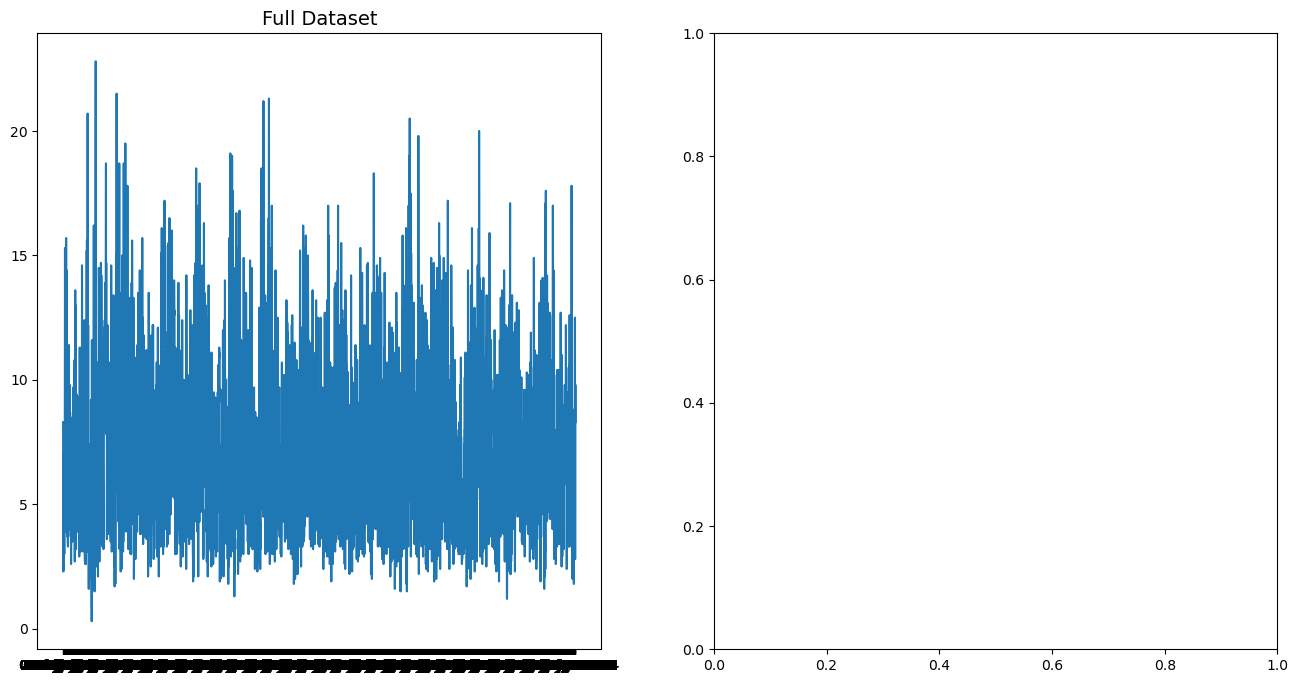

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax1 = axes[0]
ax2 = axes[1]
ax1.plot(weather["date"], weather["wdsp"])
#ax1.plot(mean_daily_temp)
#ax1.plot(mean_monthly_temp)
#ax1.set_title('Full Dataset', fontsize=14)

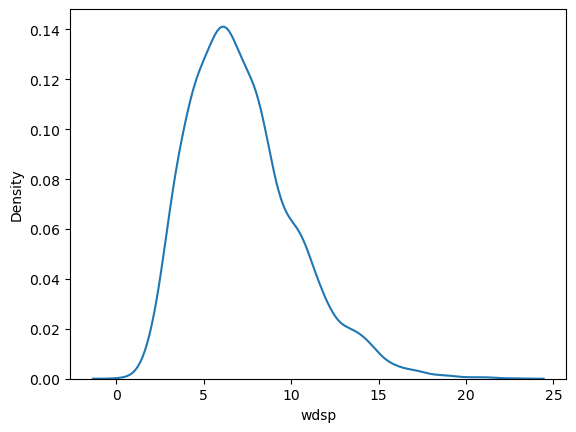

In [327]:
sns.kdeplot(weather["wdsp"])
#weatherx = [0,4,8,11,25]
#weathery = [0.2, 0.2, 0.2, 0.2, 0.2]
#z = ['unacceptable','poor','good','excellent','unacceptable2']
#sns.barplot(x=weatherx, y=weathery, hue=z)
plt.show()


In [332]:
weather['category']=''
x=1
weather.loc[x, 'category'] = "good"
weather.head(5)

,date,wdsp,hm,hg,category
0,26-feb-2010,8.3,14,20,
1,27-feb-2010,4.3,9,14,good
2,28-feb-2010,4.9,17,24,
3,01-mar-2010,2.3,6,8,
4,02-mar-2010,7.1,12,19,


We will now add a column to the weather dataframe to categorize the windspeed 

In [ ]:
# create a new column
weather['category']=''
#for row in weather.itertuples():
    #if row.wdsp == ' ':
    #    print('found blank ', row)

    run = True
    while (run):
        choice = menu.do_menu()
        match choice:

            case 0:
                # Exit the program
                print("Exiting...")
                run = False

            case 1:
                # Write the overall summary for the dataset, and the summary for each species to a text file
                ws.summary(iris, "all")

            case 2:
                # Draw the plots for all variables in one figure
                ha.plot_all(iris)

            case 3:

            case 4:
                # Draw the scatter plots - function is contained in scatter_all.py
                # Generate plots with both Matplotlib and Seaborn for comparison
                sa.scatter_all(iris)

            case 5:
                # Pandas correlation function here:
                wc.iris_corr(iris)

            case 6:
                # Experimental code for best fit here
                bf.bestfit_all(iris)

            case _:
                # Catch-all for entries other than the ones listed above
                print("Invalid entry, exiting...")
                run = False


## References
g1. https://en.wikipedia.org/wiki/Galway_Wind_Park